In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [30]:
from google.colab import files
uploaded = files.upload()

Saving World Wildlife Species.csv to World Wildlife Species (1).csv


In [31]:
df = pd.read_csv(next(iter(uploaded.keys())))
print("Dataset Loaded!")
print(df.head())

Dataset Loaded!
   Unnamed: 0               Scientifc Name               Common Name  \
0           0           Loxodonta africana          African Elephant   
1           1                          NaN   African forest elephant   
2           2  Loxodonta africana africana  African savanna elephant   
3           3                Lycaon pictus          African Wild Dog   
4           4             Thunnus alalunga             Albacore Tuna   

     Conservation Status  
0                    NaN  
1  Critically Endangered  
2             Endangered  
3             Endangered  
4        Near Threatened  


In [32]:
print("\nColumns in the dataset:", df.columns)
print("\nUnique Conservation Status Values:", df['Conservation Status'].unique())


Columns in the dataset: Index(['Unnamed: 0', 'Scientifc Name', 'Common Name', 'Conservation Status'], dtype='object')

Unique Conservation Status Values: [nan 'Critically Endangered' 'Endangered' 'Near Threatened'
 'Least Concern' 'Vulnerable']


In [33]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['Common Name'])
df['status_encoded'] = label_encoder.fit_transform(df['Conservation Status'])

In [34]:
np.random.seed(42)
df['latitude'] = np.random.uniform(8.0, 37.0, len(df))
df['longitude'] = np.random.uniform(68.0, 97.0, len(df))

In [35]:
scaler = MinMaxScaler()
df[['latitude', 'longitude']] = scaler.fit_transform(df[['latitude', 'longitude']])

In [36]:
X = df[['species_encoded', 'status_encoded', 'latitude', 'longitude']]
y = df['status_encoded']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(df['status_encoded'].unique()), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.1739 - loss: 4.2637 - val_accuracy: 0.1250 - val_loss: 2.5645
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2147 - loss: 3.1951 - val_accuracy: 0.1875 - val_loss: 2.0892
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2424 - loss: 2.9962 - val_accuracy: 0.1250 - val_loss: 1.7975
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2716 - loss: 2.6634 - val_accuracy: 0.1250 - val_loss: 1.6398
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2165 - loss: 2.3736 - val_accuracy: 0.1250 - val_loss: 1.6745
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1960 - loss: 2.0988 - val_accuracy: 0.3125 - val_loss: 1.7090
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4202 - loss: 1.9929 - val_accuracy: 0.3125 - val_loss: 1.7743
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4258 - loss: 1.6759 - val_accuracy: 0.1875 - val_loss: 1.9616


In [41]:
results = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {results[0]}, Test Accuracy: {results[1]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3500 - loss: 1.4375

Test Loss: 1.4374717473983765, Test Accuracy: 0.3499999940395355


In [42]:
y_pred = model.predict(X_test).argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.71      0.45      0.56        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.50      0.20      0.29         5

    accuracy                           0.35        20
   macro avg       0.27      0.23      0.21        20
weighted avg       0.53      0.35      0.40        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [65]:
example_species = label_encoder.transform(['tiger'])[0]
grid_features = np.c_[np.full(len(grid), example_species), np.full(len(grid), 1), grid]

predictions = model.predict(grid_features).argmax(axis=1)
predictions = predictions.reshape(100, 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


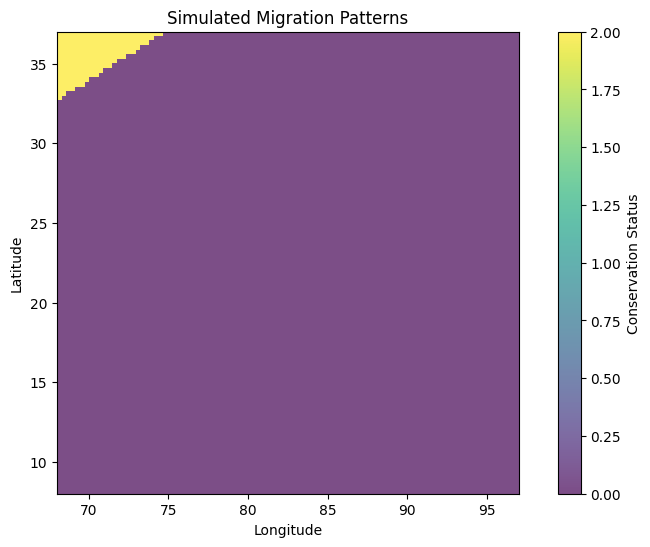

In [66]:
plt.figure(figsize=(10, 6))
plt.imshow(predictions, extent=[lon_range.min(), lon_range.max(), lat_range.min(), lat_range.max()],
           origin='lower', cmap='viridis', alpha=0.7)
plt.colorbar(label='Conservation Status')
plt.title('Simulated Migration Patterns')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [62]:
import folium
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [63]:
lat_range = np.linspace(8.0, 37.0, 100)
lon_range = np.linspace(68.0, 97.0, 100)
grid = np.array([[lat, lon] for lat in lat_range for lon in lon_range])

In [67]:
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)


for i in range(len(grid)):
    lat, lon = grid[i]
    status = predictions.flatten()[i]


    if status == 0:
        color = 'green'
    elif status == 1:
        color = 'orange'
    else:
        color = 'red'


    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(m)


m.save("migration_patterns_map.html")


m